In [1]:
import pandas as pd
import numpy as np
from itertools import accumulate
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

df_unfiltered = pd.read_csv('stations_data.csv')
territory_df = pd.read_excel('SDGE_territory.xlsx')
columns_to_keep = ['access_code', 'access_days_time', 'cards_accepted', 'expected_date', 'fuel_type_code', 'id','maximum_vehicle_class', 'open_date', 'owner_type_code',
'restricted_access', 'status_code', 'funding_sources', 'facility_type','station_name',
'latitude', 'longitude', 'city', 'country', 'intersection_directions','state', 'street_address', 'zip']
df = df_unfiltered[columns_to_keep]
sdge_df = df.merge(territory_df, left_on = 'zip', right_on = 'ZIP_CODE')
sdge_df.shape[0]

/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_67485/590337739.py:8: DtypeWarning: Columns (14,28,33,46,50,51,52,53,54,55,56,60,62,63,73,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df_unfiltered = pd.read_csv('stations_data.csv')


1357

/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_43796/2116898976.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  size = [fuel_data[0]] + [sum(fuel_data[1:])]


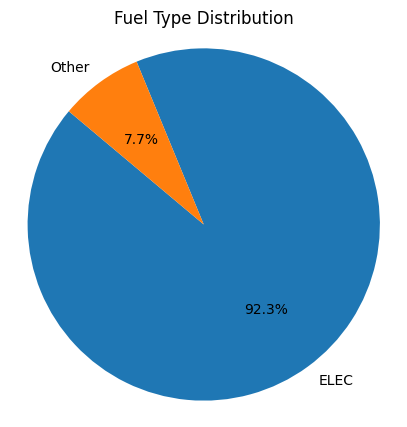

In [12]:
#PIE CHART distribution of fuel type
fuel_data = sdge_df['fuel_type_code'].value_counts()
labels = ['ELEC'] + ['Other']
size = [fuel_data[0]] + [sum(fuel_data[1:])]

plt.figure(figsize=(5, 5))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.axis('equal') 
plt.show()

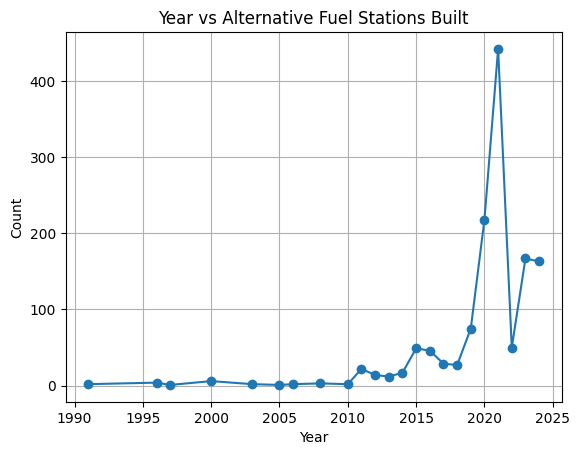

In [13]:
sdge_df['open_date'] = pd.to_datetime(sdge_df['open_date'])
sdge_df['year'] = sdge_df['open_date'].dt.year

#LINE CHARRT
years = list(sdge_df.groupby('year').count()['access_code'].index)
count = sdge_df.groupby('year').count()['access_code']
plt.plot(years, count, marker='o') 
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year vs Alternative Fuel Stations Built')
plt.grid(True)  
plt.show()


In [14]:
#Only interested cities
cities = [
    "San Diego", 
    "Chula Vista", 
    "Escondido", 
    "Carlsbad", 
    "Oceanside", 
    "El Cajon", 
    "La Mesa", 
    "Santee", 
    "Encinitas", 
    "National City", 
    "Coronado", 
    "Poway", 
    "Vista", 
    "Solana Beach", 
    "Del Mar", 
    "San Marcos"
]

sd_df = df[(df['city'].isin(cities)) & (df['state'] == "CA")] 
sd_df['open_date'] = pd.to_datetime(sd_df['open_date'])
sd_df['year'] = sd_df['open_date'].dt.year

/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_43796/4016044925.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_df['open_date'] = pd.to_datetime(sd_df['open_date'])
/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_43796/4016044925.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_df['year'] = sd_df['open_date'].dt.year


In [16]:
#BAR RACE CHART(in html file)
per_city_per_year = sd_df.groupby(['city', 'year']).size().unstack(fill_value=0)
time_series_data =  [['Year'] + list(per_city_per_year.columns)]
for city in cities:
    temp = per_city_per_year.loc[city].tolist()
    accumulated = list(accumulate(temp))
    time_series_data.append([city] + accumulated)

In [17]:
from IPython.core.display import display, HTML

# To read and display an external HTML file
with open('bar_race.html', 'r') as file:
    html_content = file.read()
    display(HTML(html_content))

/var/folders/dz/p6z2rp253yv1xd1y827n1w440000gn/T/ipykernel_43796/3497998427.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Alternatively, use the code below at https://echarts.apache.org/examples/en/editor.html?c=bar-race-country&lang=js to see the bar_race chart
```javascript
const updateFrequency = 1500;
const dimension = 0;
const categoryColors = {
  'San Diego': '#5470c6',
  'Chula Vista': '#91cc75',
  'Escondido': '#fac858',
  'Carlsbad': '#ee6666',
  'Oceanside': '#73c0de',
  'El Cajon': '#3ba272',
  'La Mesa': '#fc8452',
  'Santee': '#9a60b4',
  'Encinitas': '#ea7ccc',
  'National City': '#ff9f7f',
  'Coronado': '#d14a61',
  'Poway': '#6e7074',
  'Vista': '#f4e03f',
  'Solana Beach': '#1c9c82',
  'Del Mar': '#a52a2a',
  'San Marcos': '#ff6347'
};

const data = [
 ['Year', 1991.0, 1996.0, 1999.0, 2000.0, 2003.0, 2005.0, 2006.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024.0],
 ['San Diego', 0, 1, 1, 3, 5, 5, 6, 7, 7, 8, 13, 22, 28, 31, 58, 84, 99, 127, 172, 278, 481, 713, 788, 877],
 ['Chula Vista', 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 5, 6, 6, 10, 11, 12, 15, 15, 18, 28, 46, 55, 67, 72], 
 ['Escondido', 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 4, 4, 5, 7, 7, 8, 8, 11, 26, 32, 45, 58, 62],
 ['Carlsbad', 0, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 6, 7, 8, 8, 9, 10, 10, 13, 27, 51, 67, 80, 85], 
 ['Oceanside', 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 5, 5, 5, 6, 7, 10, 10, 13, 35, 47, 50, 63],
 ['El Cajon', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 5, 8, 9, 11, 11, 13, 18, 38, 64, 71, 82], 
 ['La Mesa', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 7, 9, 14, 15, 15], 
 ['Santee', 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 10, 13, 19, 23, 25], 
 ['Encinitas', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 3, 4, 7, 10, 16], 
 ['National City', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 22, 33, 34, 34], 
 ['Coronado', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 3, 3, 4, 4, 15, 28, 29, 30], 
 ['Poway', 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 9, 10], 
 ['Vista', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 4, 4, 5, 6, 6, 10, 17, 28, 32, 35], 
 ['Solana Beach', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 5, 5, 5, 5, 9, 9, 9, 34, 35], 
 ['Del Mar', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 3, 3, 7, 8, 11, 13, 14], 
 ['San Marcos', 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 4, 6, 7, 12, 15, 16, 18, 18, 26, 40, 64, 67, 72]
];


const years = data[0].slice(1);
let startIndex = 0;
let startYear = years[startIndex];

function transformData(yearIndex) {
  return data.slice(1).map(category => [category[yearIndex + 1], category[0]]);
}

option = {
  grid: {
    top: 10,
    bottom: 30,
    left: 150,
    right: 80
  },
  xAxis: {
    max: 'dataMax',
    axisLabel: {
      formatter: function (n) {
        return Math.round(n) + '';
      }
    }
  },
  dataset: {
    source: transformData(startIndex)
  },
  yAxis: {
    type: 'category',
    inverse: true,
    max: 16,
    axisLabel: {
      show: true,
      fontSize: 14
    },
    animationDuration: 300,
    animationDurationUpdate: 300
  },
series: [
    {
      realtimeSort: true,
      seriesLayoutBy: 'column',
      type: 'bar',
      itemStyle: {
        color: function (param) {
          return categoryColors[param.value[1]] || '#5470c6';
        }
      },
      encode: {
        x: dimension,
        y: 1
      },
      label: {
        show: true,
        precision: 1,
        position: 'right',
        valueAnimation: true,
        fontFamily: 'monospace'
      }
    }
  ],
 animationDuration: 0,
  animationDurationUpdate: updateFrequency,
  animationEasing: 'linear',
  animationEasingUpdate: 'linear',
  graphic: {
    elements: [
      {
        type: 'text',
        right: 160,
        bottom: 60,
        style: {
          text: startYear,
          font: 'bolder 80px monospace',
          fill: 'rgba(100, 100, 100, 0.25)'
        },
        z: 100
      }
    ]
  }
};

// console.log(option);
myChart.setOption(option);
for (let i = startIndex; i < years.length; ++i) {
  (function (i) {
    setTimeout(function () {
      updateYear(years[i], i);
    }, (i - startIndex) * updateFrequency);
  })(i);
}

function updateYear(year, yearIndex) {
  let source = transformData(yearIndex);
  option.series[0].data = source;
  option.graphic.elements[0].style.text = year;
  myChart.setOption(option);
}

In [20]:
#GEO SPATIAL CHART

import folium

san_diego_coords = [32.7157, -117.1611]

charger_locations = list(zip(sd_df['latitude'],sd_df['longitude']))

shopping_centers = [
    ("Westfield UTC", 32.8728, -117.2116),
    ("Fashion Valley Mall", 32.7690, -117.1687),
    ("Seaport Village", 32.7106, -117.1707),
    ("Mission Valley Mall", 32.7679, -117.1545),
    ("Las Americas Premium Outlets", 32.5449, -117.0360),
    ("Horton Plaza Park", 32.7145, -117.1618),
    ("The Headquarters at Seaport", 32.7114, -117.1697),
    ("Liberty Station", 32.7391, -117.2160),
    ("Westfield Plaza Bonita", 32.6563, -117.0573),
    ("The Forum Carlsbad", 33.0747, -117.2626),
    ("Del Mar Highlands Town Center", 32.9476, -117.2415),
    ("Encinitas Ranch Town Center", 33.0530, -117.2790),
    ("The Shoppes at Carlsbad", 33.1845, -117.3148),
    ("Otay Ranch Town Center", 32.6256, -116.9644),
    ("Village at Pacific Highlands Ranch", 32.9702, -117.1798),
    ("Carmel Mountain Plaza", 32.9806, -117.0807),
    ("La Jolla Village Square", 32.8650, -117.2309),
    ("Grossmont Center", 32.7815, -117.0117),
    ("Hillcrest Uptown Shopping Center", 32.7487, -117.1653),
    ("Clairemont Town Square", 32.8297, -117.1983),
    ("La Mesa Springs Shopping Center", 32.7689, -117.0186),
    ("Torrey Hills Center", 32.9274, -117.2338),
    ("Village Walk at Eastlake", 32.6544, -116.9674),
    ("Santee Trolley Square", 32.8381, -116.9729),
    ("Carmel Country Plaza", 32.9439, -117.2234),
    ("Balboa Mesa Shopping Center", 32.8221, -117.1871),
    ("Rancho San Diego Towne Center", 32.7471, -116.9433),
    ("Bird Rock Coffee Roasters Plaza", 32.8220, -117.2782),
    ("Terra Nova Plaza", 32.6312, -117.0592),
    ("Hazard Center", 32.7676, -117.1557)
]

offices_companies = [
    ("Qualcomm", 32.8975, -117.1940),
    ("Illumina", 32.8791, -117.2074),
    ("Scripps Research", 32.8765, -117.2353),
    ("General Atomics", 32.8799, -117.1339),
    ("Northrop Grumman", 32.8351, -117.1226),
    ("Thermo Fisher Scientific", 32.8922, -117.2201),
    ("UC San Diego Health", 32.8726, -117.2389),
    ("Sharp HealthCare", 32.7912, -117.0995),
    ("San Diego Gas & Electric", 32.7067, -117.1549),
    ("Jack in the Box", 32.8222, -117.1541),
    ("Dexcom", 32.8916, -117.2026),
    ("Viasat", 33.1265, -117.2770),
    ("Becton Dickinson & Co.", 32.8842, -117.1995),
    ("Pfizer", 32.9016, -117.2320),
    ("Petco", 32.7104, -117.1589),
    ("Sony Electronics", 32.9852, -117.0814),
    ("ResMed", 32.8984, -117.2413),
    ("Mitchell International", 32.8457, -117.1716),
    ("Teradata", 32.9264, -117.2299),
    ("LPL Financial", 32.9495, -117.2411),
    ("ViaCyte", 32.8768, -117.2314),
    ("ServiceNow", 32.9009, -117.1929),
    ("Arena Pharmaceuticals", 32.8863, -117.2203),
    ("NuVasive", 32.8963, -117.1910),
    ("The Salk Institute", 32.8860, -117.2454),
    ("Biocom California", 32.8738, -117.2051),
    ("BlueNalu", 32.7317, -117.1850),
    ("Cubic Corporation", 32.8331, -117.1355),
    ("BioLegend", 32.8733, -117.1842),
    ("Rady Children's Hospital", 32.7890, -117.1542)
]

# Create a map centered on San Diego
m = folium.Map(location=san_diego_coords, zoom_start=13)

# Add markers for each charger location (green markers)
for charger in charger_locations:
    folium.Marker(
        location=charger,
        popup='Charger',
        icon=folium.Icon(color='green')  # Green color for chargers
    ).add_to(m)

# Add markers for each shopping center (blue markers)
for center in shopping_centers:
    folium.Marker(
        location=(center[1], center[2]),
        popup=center[0],
        icon=folium.Icon(color='red')  # Red color for shopping centers
    ).add_to(m)

for office in offices_companies:
    folium.Marker(
        location=(office[1], office[2]),
        popup=office[0],
        icon=folium.Icon(color='black')  # Black color for offices
    ) .add_to(m)

# Save the map to an HTML file
m.save("san_diego_chargers_and_shopping_centers_map.html")

# Display the map (if using Jupyter)
m


In [21]:
#second dataset, income/zipcode
income_df = pd.read_csv('income_zipcode.csv')
income_df = income_df[['NAME','S1903_C03_015E']].iloc[1:]
income_df['NAME'] = income_df['NAME'].str[-5:]
income_df = income_df.rename(columns={'NAME': 'zip', 'S1903_C03_015E': 'income'})
income_df = income_df[income_df['income'] != '-']
#income_df['income'] = income_df['income'].astype(int)

In [41]:
temp_df = pd.DataFrame(sd_df.groupby('zip').count()['access_code'])
merged_df = temp_df.merge(income_df,left_index = True, right_on = 'zip').set_index('zip')
merged_df = merged_df.rename(columns={'access_code': 'count'})
merged_df['income'] = merged_df['income'].astype(int)


93358